Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
X: (273, 6)


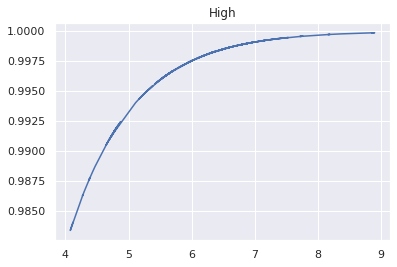

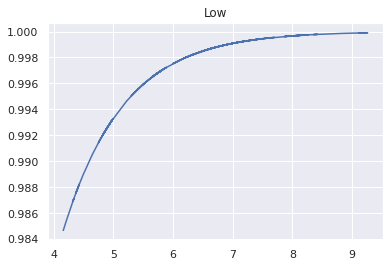

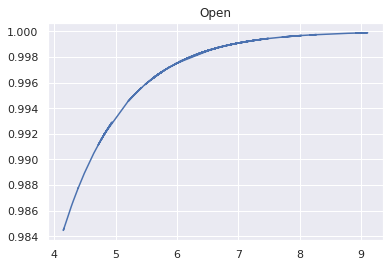

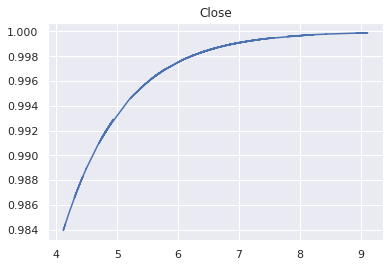

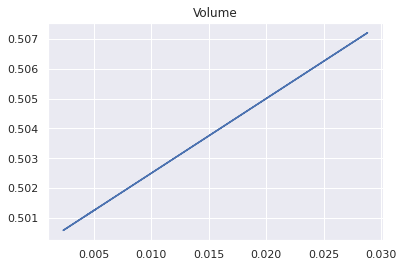

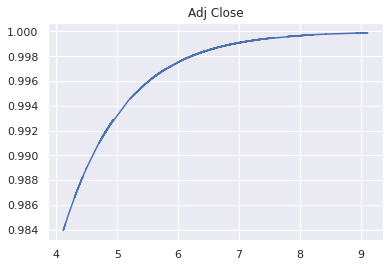

[[0.11698941 0.1231105  0.13401721 0.12431587 0.12431587]
 [0.1286011  0.14474425 0.14221037 0.13916563 0.13916563]
 [0.11894599 0.13728851 0.13165455 0.12667322 0.12667322]
 ...
 [1.         0.97925856 0.99757249 0.96247777 0.96247777]
 [0.98806633 1.         1.         1.         1.        ]
 [0.98100744 0.99990917 0.99554895 0.98515794 0.98515794]]
x.shape: (273, 5)
y.shape: (273, 1)


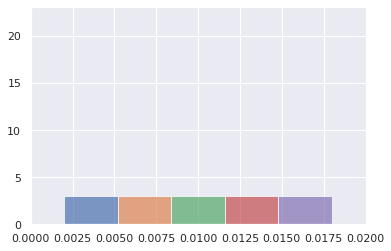

r2 score: -0.126176897425047
mae:  326.0
accuracy and recall：
               precision    recall  f1-score   support

        1097       0.00      0.00      0.00       1.0
        1105       0.00      0.00      0.00       0.0
        1120       0.00      0.00      0.00       0.0
        1211       0.00      0.00      0.00       1.0
        1217       0.00      0.00      0.00       1.0
        1263       0.00      0.00      0.00       1.0
        1276       0.00      0.00      0.00       1.0
        1279       0.00      0.00      0.00       0.0
        1283       0.00      0.00      0.00       1.0
        1356       0.00      0.00      0.00       1.0
        1402       0.00      0.00      0.00       1.0
        1406       0.00      0.00      0.00       1.0
        1415       0.00      0.00      0.00       1.0
        1417       0.00      0.00      0.00       1.0
        1419       0.00      0.00      0.00       1.0
        1431       0.00      0.00      0.00       2.0
        1442      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(30.5, 0.5, 'true')

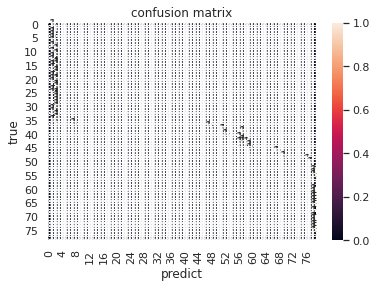

In [ ]:
#使用每个预测任务A组、B组（每个组）的合适的完整特征实现Ridge(L2)和Lasso(L1)逻辑回归
#Group A Stock return predict
#binomial classification

#仅预测非常短期回报的方向；A组是二项式分类：因变量最好标记为0、1vs.1、；1。
#接近零的移动将出现在每天的回报中。如果我们将它们与负值捆绑在一起，这很可能会产生对负值回报的过度预测，因此您可以选择基于您的数据。
import os
import time
import datetime
import numpy as np
import pandas as pd
#for implementation of new direct calls ==> import pandas_datareader as pdr
import pandas_datareader as pdr
from pandas_datareader.famafrench import get_available_datasets
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import preprocessing
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, median_absolute_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#Group A
data = pdr.get_data_yahoo("GOOG", start="2020-4-01", end="2021-04-30")
print(data.columns)
# print(data.head(10))
title = data.columns
# for i in data:
#   if i<=0:
#     i =1
X = data
print("X:",X.shape)
# np.array(data).reshape(-1,1)
y = np.array(data["Adj Close"]).reshape(-1,1).astype('int')

def sigmoid(x):
  return (1. / (1. + np.exp(-x))).astype("float")
#plot sigmoid
for i in range(6):
  x = 10000/X[title[i]]
  yi = sigmoid(x)
  plt.plot(x, yi)
  plt.title(title[i])
  plt.show()
# scaling to uniform [0, 1] range.
X = MinMaxScaler().fit(data).transform(data)
# select dataset except column 'Volumn'
X = X[:,[0,1,2,3,5]]
print(X[10:])


# RobustScaler().fit(data).transform(data)
# MinMaxScaler().fit(data).transform(data)
# preprocessing.normalize(data)
print("x.shape:", X.shape)
print("y.shape:", y.shape)
#plot histogram
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(X, bins=50, alpha=0.7)
plt.xlim(0,0.02)
plt.show()
#split dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
mlt =LogisticRegression(penalty='l2',class_weight='balanced')
mlt.fit(x_train, y_train.ravel())
# print("coef:",mlt.coef_)
y_predict = mlt.predict(x_test)

# score
# print("score：", mlt.score(x_test, y_test))
print("r2 score:",r2_score(y_test, y_predict))
print("mae: ",median_absolute_error(y_test, y_predict))
#accuracy and recall
print("accuracy and recall：\r\n", classification_report(y_test, y_predict))
#confusion matrix, heatmap
C2= confusion_matrix(y_test, y_predict)
sns.set()
f,ax=plt.subplots()
sns.heatmap(C2,annot=True,ax=ax)
ax.set_title('confusion matrix')
ax.set_xlabel('predict')
ax.set_ylabel('true')
